In [1]:
from geodata import Dataset
from geodata.model.wind import WindExtrapolationModel

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-21 21:56:07,575 - geodata - WARNING - Numba not installed. Using pure Python implementation.


In [2]:
dataset = Dataset(
    module="merra2",
    weather_data_config="slv_flux_hourly",
    years=slice(2010, 2010),
    months=slice(1,1)
)

2023-08-21 21:56:07,580 - geodata.dataset - INFO - Using global bounds.
2023-08-21 21:56:07,580 - geodata.dataset - INFO - Directory /Users/apple/.local/geodata/merra2 found, checking for completeness.
2023-08-21 21:56:07,581 - geodata.dataset - INFO - Directory complete.


In [3]:
model = WindExtrapolationModel(dataset)

In [4]:
model.prepare()

2023-08-21 21:56:15,887 - geodata - INFO - The model is already prepared.


In [21]:
speed = model.estimate(
    height=12,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [23]:
speed

<xarray.DataArray (time: 744, lat: 361, lon: 576)>
dask.array<mul, shape=(744, 361, 576), dtype=float32, chunksize=(24, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2010-01-01T00:30:00 ... 2010-01-31T23:30:00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

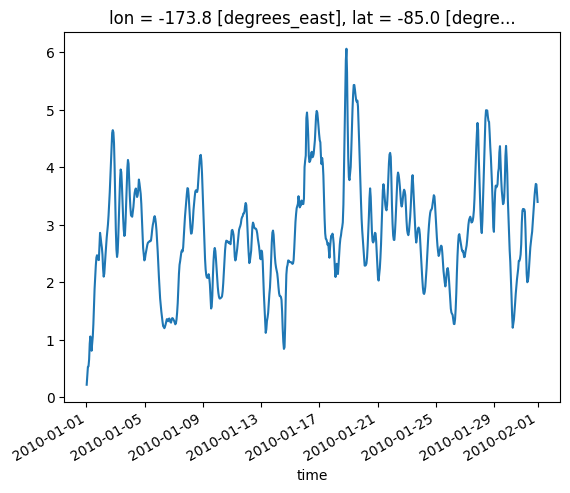

In [34]:
speed1d = speed.isel(lat=10, lon=10)
speed1d.plot()